In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from dateutil.parser import parse
from datetime import datetime
import re
from sklearn.metrics import precision_recall_curve
import seaborn as sns
from scipy.stats import linregress
import statsmodels.api as sm
from scipy import stats

In [2]:
df = pd.read_csv('/Users/emashraky/seminarion/data_numeric.csv', sep=',',header=1, error_bad_lines=False)

In [3]:
# df.head()

In [4]:
df.drop([0], inplace = True)

In [5]:
# df.head()

#### removeing records with incomplete responses for ei, wlb or wls

In [6]:
df = df.dropna(subset=df.columns.values[17:82])

#### first let's find the EI for each record

In [7]:
#first 17 columns are meta data
#first 30 questions are for EI
ei_df = df.iloc[:, 17:47]
ei_df.columns.values

array(['השאלות הבאות נועדו להעריך את רמת האינטליגנציה הרגשית שלך. אנא ענה על השאלות על פי המדרג בהתאם למה שאתה מאמין מייצג אותך בצורה הנכונה ביותר. - אני משתמש ברגשות חיוביים ושליליים כאחד כמקור אינפורמציה  לניהול חיי',
       'השאלות הבאות נועדו להעריך את רמת האינטליגנציה הרגשית שלך. אנא ענה על השאלות על פי המדרג בהתאם למה שאתה מאמין מייצג אותך בצורה הנכונה ביותר. - רגשות שליליים עוזרים לי בזיהוי הדברים שעלי לשנות בחיי',
       'השאלות הבאות נועדו להעריך את רמת האינטליגנציה הרגשית שלך. אנא ענה על השאלות על פי המדרג בהתאם למה שאתה מאמין מייצג אותך בצורה הנכונה ביותר. - אני נשאר רגוע במצבי לחץ',
       'השאלות הבאות נועדו להעריך את רמת האינטליגנציה הרגשית שלך. אנא ענה על השאלות על פי המדרג בהתאם למה שאתה מאמין מייצג אותך בצורה הנכונה ביותר. - אני יכול לנהל את רגשותי במצבים שונים',
       'השאלות הבאות נועדו להעריך את רמת האינטליגנציה הרגשית שלך. אנא ענה על השאלות על פי המדרג בהתאם למה שאתה מאמין מייצג אותך בצורה הנכונה ביותר. - במצבים קשים, אני יודע להשאר רגוע וממוקד ולהתמודד עם קשיים',

In [8]:
ei_df.head()

,השאלות הבאות נועדו להעריך את רמת האינטליגנציה הרגשית שלך. אנא ענה על השאלות על פי המדרג בהתאם למה שאתה מאמין מייצג אותך בצורה הנכונה ביותר. - אני משתמש ברגשות חיוביים ושליליים כאחד כמקור אינפורמציה לניהול חיי,השאלות הבאות נועדו להעריך את רמת האינטליגנציה הרגשית שלך. אנא ענה על השאלות על פי המדרג בהתאם למה שאתה מאמין מייצג אותך בצורה הנכונה ביותר. - רגשות שליליים עוזרים לי בזיהוי הדברים שעלי לשנות בחיי,השאלות הבאות נועדו להעריך את רמת האינטליגנציה הרגשית שלך. אנא ענה על השאלות על פי המדרג בהתאם למה שאתה מאמין מייצג אותך בצורה הנכונה ביותר. - אני נשאר רגוע במצבי לחץ,השאלות הבאות נועדו להעריך את רמת האינטליגנציה הרגשית שלך. אנא ענה על השאלות על פי המדרג בהתאם למה שאתה מאמין מייצג אותך בצורה הנכונה ביותר. - אני יכול לנהל את רגשותי במצבים שונים,"השאלות הבאות נועדו להעריך את רמת האינטליגנציה הרגשית שלך. אנא ענה על השאלות על פי המדרג בהתאם למה שאתה מאמין מייצג אותך בצורה הנכונה ביותר. - במצבים קשים, אני יודע להשאר רגוע וממוקד ולהתמודד עם קשיים",השאלות הבאות נועדו להעריך את רמת האינטליגנציה הרגשית שלך. אנא ענה על השאלות על פי המדרג בהתאם למה שאתה מאמין מייצג אותך בצורה הנכונה ביותר. - כשאני ניצב מול אתגרים אני יודע לייצר מגוון רב של רגשות חיוביים,השאלות הבאות נועדו להעריך את רמת האינטליגנציה הרגשית שלך. אנא ענה על השאלות על פי המדרג בהתאם למה שאתה מאמין מייצג אותך בצורה הנכונה ביותר. - אני אחראי על רגשותי,השאלות הבאות נועדו להעריך את רמת האינטליגנציה הרגשית שלך. אנא ענה על השאלות על פי המדרג בהתאם למה שאתה מאמין מייצג אותך בצורה הנכונה ביותר. - אני יודע להרגיע את עצמי במהירות לאחר שאני מתרגז,השאלות הבאות נועדו להעריך את רמת האינטליגנציה הרגשית שלך. אנא ענה על השאלות על פי המדרג בהתאם למה שאתה מאמין מייצג אותך בצורה הנכונה ביותר. - אני טוב בהקשבה לבעיות של אנשים אחרים,השאלות הבאות נועדו להעריך את רמת האינטליגנציה הרגשית שלך. אנא ענה על השאלות על פי המדרג בהתאם למה שאתה מאמין מייצג אותך בצורה הנכונה ביותר. - אני לא שוקע ברגשות שליליים לאורך זמן,...,השאלות הבאות נועדו להעריך את רמת האינטליגנציה הרגשית שלך. אנא ענה על השאלות על פי המדרג בהתאם למה שאתה מאמין מייצג אותך בצורה הנכונה ביותר. - אני יכול לזהות איך אנשים מרגישים על פי הבעות הפנים שלהם,השאלות הבאות נועדו להעריך את רמת האינטליגנציה הרגשית שלך. אנא ענה על השאלות על פי המדרג בהתאם למה שאתה מאמין מייצג אותך בצורה הנכונה ביותר. - אני יכול לנהל רגשות שליליים כשעלי לתפקד,השאלות הבאות נועדו להעריך את רמת האינטליגנציה הרגשית שלך. אנא ענה על השאלות על פי המדרג בהתאם למה שאתה מאמין מייצג אותך בצורה הנכונה ביותר. - אני יודע לקרא רמזים חברתיים המצביעים על מה שאחרים צריכים,השאלות הבאות נועדו להעריך את רמת האינטליגנציה הרגשית שלך. אנא ענה על השאלות על פי המדרג בהתאם למה שאתה מאמין מייצג אותך בצורה הנכונה ביותר. - אנשים רואים בי מישהו שיכולה להדריך אחרים בנושא רגשותיהם,השאלות הבאות נועדו להעריך את רמת האינטליגנציה הרגשית שלך. אנא ענה על השאלות על פי המדרג בהתאם למה שאתה מאמין מייצג אותך בצורה הנכונה ביותר. - אנשים המודעים לרגשותיהם יודעים לנהל את חייהם טוב יותר,"השאלות הבאות נועדו להעריך את רמת האינטליגנציה הרגשית שלך. אנא ענה על השאלות על פי המדרג בהתאם למה שאתה מאמין מייצג אותך בצורה הנכונה ביותר. - בד""כ אני טוב בלשפר לאנשים את ההרגשה",השאלות הבאות נועדו להעריך את רמת האינטליגנציה הרגשית שלך. אנא ענה על השאלות על פי המדרג בהתאם למה שאתה מאמין מייצג אותך בצורה הנכונה ביותר. - אנשים נוטים לבוא אלי בבקשת עצה בנושא יחסים בין אנשים,השאלות הבאות נועדו להעריך את רמת האינטליגנציה הרגשית שלך. אנא ענה על השאלות על פי המדרג בהתאם למה שאתה מאמין מייצג אותך בצורה הנכונה ביותר. - אני רגיש לרגשותיהם של אחרים,השאלות הבאות נועדו להעריך את רמת האינטליגנציה הרגשית שלך. אנא ענה על השאלות על פי המדרג בהתאם למה שאתה מאמין מייצג אותך בצורה הנכונה ביותר. - אני עוזר לאנשים להשתמש במוטיבציה שלהם להשגת מטרותיהם,השאלות הבאות נועדו להעריך את רמת האינטליגנציה הרגשית שלך. אנא ענה על השאלות על פי המדרג בהתאם למה שאתה מאמין מייצג אותך בצורה הנכונה ביותר. - אני יודעת להתנער מרגשות שליליים
1,1,1,4,3,3,2,1,3,1,1,...,1,4,1,1,1,1,3,1,2,2
2,2,2,3,4,3,2,4,3,4,1,...,2,3,4,4,2,3,4,2,2,2
3,1,2,3,3,3,1,2,3,1,3,...,2,2,2,1,1,2,1,1,2,2
4,3,2,2,2,2,2,2,3,2,2,...,2,2,2,2,2,2,2,2,2,3
5,1,3,4,3,2,3,3,2,1,1,...,1,1,1,1,1,1,1,1,1,3


#### now let's find the WLB for each

In [9]:
#next 29 questions are for WLB
wlb_df = df.iloc[:, 47:76]
for idx, val in enumerate(wlb_df.columns.values):
    print(idx)
    print(val)

0
השאלות הבאות מתייחסות לרמת השילוב שלך את חיי המשפחה עם חיי העבודה. אנא סמן את ההיגד שהכי מתאים לך - האם אתה מרגיש שאף פעם אין לך 'זמן לנשום' לפני המטלה/ פרויקט הבא?
1
השאלות הבאות מתייחסות לרמת השילוב שלך את חיי המשפחה עם חיי העבודה. אנא סמן את ההיגד שהכי מתאים לך - האם אתה מנצל את כל ימי החופש שלך בשנה?
2
השאלות הבאות מתייחסות לרמת השילוב שלך את חיי המשפחה עם חיי העבודה. אנא סמן את ההיגד שהכי מתאים לך - האם אתה עובד יותר משעה ביום בזמן שאתה בחופש?
3
השאלות הבאות מתייחסות לרמת השילוב שלך את חיי המשפחה עם חיי העבודה. אנא סמן את ההיגד שהכי מתאים לך - האם, כל בוקר, אתה מצפה להתחיל את יום העבודה שלך?
4
השאלות הבאות מתייחסות לרמת השילוב שלך את חיי המשפחה עם חיי העבודה. אנא סמן את ההיגד שהכי מתאים לך - האם אתה מרגיש מותש, שחוק, ובלי יכולת לתת את כל-כולך בכל תחום של החיים?
5
השאלות הבאות מתייחסות לרמת השילוב שלך את חיי המשפחה עם חיי העבודה. אנא סמן את ההיגד שהכי מתאים לך - האם אתה חסר סבלנות עם בני משפחתך, או עמיתיך לעבודה?
6
השאלות הבאות מתייחסות לרמת השילוב שלך את חיי המשפחה עם חיי העבודה

In [10]:
wlb_df.head()

,השאלות הבאות מתייחסות לרמת השילוב שלך את חיי המשפחה עם חיי העבודה. אנא סמן את ההיגד שהכי מתאים לך - האם אתה מרגיש שאף פעם אין לך 'זמן לנשום' לפני המטלה/ פרויקט הבא?,השאלות הבאות מתייחסות לרמת השילוב שלך את חיי המשפחה עם חיי העבודה. אנא סמן את ההיגד שהכי מתאים לך - האם אתה מנצל את כל ימי החופש שלך בשנה?,השאלות הבאות מתייחסות לרמת השילוב שלך את חיי המשפחה עם חיי העבודה. אנא סמן את ההיגד שהכי מתאים לך - האם אתה עובד יותר משעה ביום בזמן שאתה בחופש?,"השאלות הבאות מתייחסות לרמת השילוב שלך את חיי המשפחה עם חיי העבודה. אנא סמן את ההיגד שהכי מתאים לך - האם, כל בוקר, אתה מצפה להתחיל את יום העבודה שלך?","השאלות הבאות מתייחסות לרמת השילוב שלך את חיי המשפחה עם חיי העבודה. אנא סמן את ההיגד שהכי מתאים לך - האם אתה מרגיש מותש, שחוק, ובלי יכולת לתת את כל-כולך בכל תחום של החיים?","השאלות הבאות מתייחסות לרמת השילוב שלך את חיי המשפחה עם חיי העבודה. אנא סמן את ההיגד שהכי מתאים לך - האם אתה חסר סבלנות עם בני משפחתך, או עמיתיך לעבודה?",השאלות הבאות מתייחסות לרמת השילוב שלך את חיי המשפחה עם חיי העבודה. אנא סמן את ההיגד שהכי מתאים לך - האם יש לך לפחות 30 דקות 'זמן עצמי' כל יום?,"השאלות הבאות מתייחסות לרמת השילוב שלך את חיי המשפחה עם חיי העבודה. אנא סמן את ההיגד שהכי מתאים לך - האם אתה מרגיש שאתה מפספס דברים שהם בראש סדר העדיפויות שלך (אירועים של הילדים, אירועים משמעותיים בעבודה)?",השאלות הבאות מתייחסות לרמת השילוב שלך את חיי המשפחה עם חיי העבודה. אנא סמן את ההיגד שהכי מתאים לך - האם מחשבות בנושאי עבודה מונעות ממך שינת לילה טובה?,"השאלות הבאות מתייחסות לרמת השילוב שלך את חיי המשפחה עם חיי העבודה. אנא סמן את ההיגד שהכי מתאים לך - האם קשה לך להגיד ""לא"" לבקשות של חברים בעבודה?",...,"השאלות הבאות מתייחסות לרמת השילוב שלך את חיי המשפחה עם חיי העבודה. אנא סמן את ההיגד שהכי מתאים לך - אתה מרגיש לא בנוח לא לעשות כלום, גם כשאתה בחופשה","השאלות הבאות מתייחסות לרמת השילוב שלך את חיי המשפחה עם חיי העבודה. אנא סמן את ההיגד שהכי מתאים לך - אתה מביא את הרגשות הטעונים מהעבודה אל הבית, וההיפך",השאלות הבאות מתייחסות לרמת השילוב שלך את חיי המשפחה עם חיי העבודה. אנא סמן את ההיגד שהכי מתאים לך - אתה מרוצה מהדרך בה אתה מצליח לשלב את חיי העבודה בחיי המשפחה (Work - life balance),השאלות הבאות מתייחסות לרמת השילוב שלך את חיי המשפחה עם חיי העבודה. אנא סמן את ההיגד שהכי מתאים לך - האם אתה לוקח חופש מהעבודה על מנת לעשות דברים שאתה אוהב?,השאלות הבאות מתייחסות לרמת השילוב שלך את חיי המשפחה עם חיי העבודה. אנא סמן את ההיגד שהכי מתאים לך - אתה מאמין שאתה עובד יותר ממה שהגיוני?,"השאלות הבאות מתייחסות לרמת השילוב שלך את חיי המשפחה עם חיי העבודה. אנא סמן את ההיגד שהכי מתאים לך - אתה מוצא זמן להתאמן, לאכול כמו שצריך ולשמור על בריאות נאותה?",השאלות הבאות מתייחסות לרמת השילוב שלך את חיי המשפחה עם חיי העבודה. אנא סמן את ההיגד שהכי מתאים לך - האם אירועים ומטענים מהחיים הפרטיים שלך פוגעים לך בסדר-היום בעבודה?,"השאלות הבאות מתייחסות לרמת השילוב שלך את חיי המשפחה עם חיי העבודה. אנא סמן את ההיגד שהכי מתאים לך - אתה מרגיש נינוח ורגוע כשאתה בבית לאחר יום עבודה, או בסוף שבוע?",השאלות הבאות מתייחסות לרמת השילוב שלך את חיי המשפחה עם חיי העבודה. אנא סמן את ההיגד שהכי מתאים לך - אתה מצליח לישון היטב רוב הלילות?,"השאלות הבאות מתייחסות לרמת השילוב שלך את חיי המשפחה עם חיי העבודה. אנא סמן את ההיגד שהכי מתאים לך - אתה מרגיש שאתה מבזבז יותר מידי זמן בלעשות דברים שאינך מעוניין, או בחברת אנשים שאינך מעוניין להיות עימם"
1,5,1,5,1,3,2,1,4,2,4,...,5,2,3,1,5,4,2,1,2,5
2,5,5,5,2,4,5,1,5,4,2,...,2,2,2,2,2,1,4,2,2,4
3,2,3,1,2,2,3,3,3,3,1,...,1,2,2,3,1,2,2,3,3,2
4,3,1,3,1,3,4,3,3,3,3,...,3,4,3,3,3,3,4,3,3,3
5,2,5,4,2,4,3,1,4,2,2,...,1,2,1,5,4,3,2,3,3,5


In [11]:
#indexs for normal scale questions
wlb_normal_scale_indexes = [1, 3, 6, 17, 21, 22, 24, 26, 26, 27]

#### correlation between EI and WLB

In [12]:
wlb_normal_scale_columns = []
wlb_reversed_scale_columns = []
for idx, val in enumerate(wlb_df.columns.values):
    if(idx in wlb_normal_scale_indexes):
        wlb_normal_scale_columns.append(val)
    else:
        wlb_reversed_scale_columns.append(val)
print(wlb_normal_scale_columns)

['השאלות הבאות מתייחסות לרמת השילוב שלך את חיי המשפחה עם חיי העבודה. אנא סמן את ההיגד שהכי מתאים לך - האם אתה מנצל את כל ימי החופש שלך בשנה?', 'השאלות הבאות מתייחסות לרמת השילוב שלך את חיי המשפחה עם חיי העבודה. אנא סמן את ההיגד שהכי מתאים לך - האם, כל בוקר, אתה מצפה להתחיל את יום העבודה שלך?', "השאלות הבאות מתייחסות לרמת השילוב שלך את חיי המשפחה עם חיי העבודה. אנא סמן את ההיגד שהכי מתאים לך - האם יש לך לפחות 30 דקות 'זמן עצמי' כל יום?", 'השאלות הבאות מתייחסות לרמת השילוב שלך את חיי המשפחה עם חיי העבודה. אנא סמן את ההיגד שהכי מתאים לך - האם אתה מצליח, לפחות בפעם בחודש, לעשות פעילות מרגיעה אשר טוענת אותך מחדש באנרגיות', 'השאלות הבאות מתייחסות לרמת השילוב שלך את חיי המשפחה עם חיי העבודה. אנא סמן את ההיגד שהכי מתאים לך - אתה מרוצה מהדרך בה אתה מצליח לשלב את חיי העבודה בחיי המשפחה (Work - life balance)', 'השאלות הבאות מתייחסות לרמת השילוב שלך את חיי המשפחה עם חיי העבודה. אנא סמן את ההיגד שהכי מתאים לך - האם אתה לוקח חופש מהעבודה על מנת לעשות דברים שאתה אוהב?', 'השאלות הבאות מתייחסות לרמת הש

In [13]:
wlb_df.astype(float).std(axis = 1).mean()

1.1629681644639838

In [14]:
for column in wlb_reversed_scale_columns:
    print(column)
    wlb_df[column] = wlb_df[column].astype(float).apply(lambda x: 6 - x)

השאלות הבאות מתייחסות לרמת השילוב שלך את חיי המשפחה עם חיי העבודה. אנא סמן את ההיגד שהכי מתאים לך - האם אתה מרגיש שאף פעם אין לך 'זמן לנשום' לפני המטלה/ פרויקט הבא?
השאלות הבאות מתייחסות לרמת השילוב שלך את חיי המשפחה עם חיי העבודה. אנא סמן את ההיגד שהכי מתאים לך - האם אתה עובד יותר משעה ביום בזמן שאתה בחופש?
השאלות הבאות מתייחסות לרמת השילוב שלך את חיי המשפחה עם חיי העבודה. אנא סמן את ההיגד שהכי מתאים לך - האם אתה מרגיש מותש, שחוק, ובלי יכולת לתת את כל-כולך בכל תחום של החיים?
השאלות הבאות מתייחסות לרמת השילוב שלך את חיי המשפחה עם חיי העבודה. אנא סמן את ההיגד שהכי מתאים לך - האם אתה חסר סבלנות עם בני משפחתך, או עמיתיך לעבודה?
השאלות הבאות מתייחסות לרמת השילוב שלך את חיי המשפחה עם חיי העבודה. אנא סמן את ההיגד שהכי מתאים לך - האם אתה מרגיש שאתה מפספס דברים שהם בראש סדר העדיפויות שלך (אירועים של הילדים, אירועים משמעותיים בעבודה)?
השאלות הבאות מתייחסות לרמת השילוב שלך את חיי המשפחה עם חיי העבודה. אנא סמן את ההיגד שהכי מתאים לך - האם מחשבות בנושאי עבודה מונעות ממך שינת לילה טובה?
השאלות הבאו

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


השאלות הבאות מתייחסות לרמת השילוב שלך את חיי המשפחה עם חיי העבודה. אנא סמן את ההיגד שהכי מתאים לך - אתה מרגיש כי חיי המשפחה התובעניים מונעים ממך להתקדם בעבודה
השאלות הבאות מתייחסות לרמת השילוב שלך את חיי המשפחה עם חיי העבודה. אנא סמן את ההיגד שהכי מתאים לך - אתה מקנא בחברייך לעבודה, חסרי המחויבות משפחתית, אשר מצליחים  להשקיע יותר בעבודה
השאלות הבאות מתייחסות לרמת השילוב שלך את חיי המשפחה עם חיי העבודה. אנא סמן את ההיגד שהכי מתאים לך - אתה מרגיש המום מכמות המחויבות שיש על כתפייך
השאלות הבאות מתייחסות לרמת השילוב שלך את חיי המשפחה עם חיי העבודה. אנא סמן את ההיגד שהכי מתאים לך - אתה מרגיש לא בנוח לא לעשות כלום, גם כשאתה בחופשה
השאלות הבאות מתייחסות לרמת השילוב שלך את חיי המשפחה עם חיי העבודה. אנא סמן את ההיגד שהכי מתאים לך - אתה מביא את הרגשות הטעונים מהעבודה אל הבית, וההיפך
השאלות הבאות מתייחסות לרמת השילוב שלך את חיי המשפחה עם חיי העבודה. אנא סמן את ההיגד שהכי מתאים לך - אתה מאמין שאתה עובד יותר ממה שהגיוני?
השאלות הבאות מתייחסות לרמת השילוב שלך את חיי המשפחה עם חיי העבודה. אנא סמן את ה

In [15]:
wlb_df.astype(float).std(axis = 1).mean()

0.9703025920620814

In [16]:
wls_df = df.iloc[:, 76:82]

In [17]:
wls_df.head()

,"השאלות הבאות נוגעות להצלחות שלך בחיים, אנא ענה עם ההיגד שהכי תואם לתחושותייך - אתה מרוצה מהנקודה שאתה נמצא בה בחיים מבחינת הקריירה שלך","השאלות הבאות נוגעות להצלחות שלך בחיים, אנא ענה עם ההיגד שהכי תואם לתחושותייך - אתה מרוצה מהנקודה שאתה נמצא בה בחיים מבחינת חיי המשפחה שלך","השאלות הבאות נוגעות להצלחות שלך בחיים, אנא ענה עם ההיגד שהכי תואם לתחושותייך - אתה עומד ביעדים שלך בעבודה בהצלחה רבה","השאלות הבאות נוגעות להצלחות שלך בחיים, אנא ענה עם ההיגד שהכי תואם לתחושותייך - חיי המשפחה שלך מספקים מאוד, לך ולבני ביתך","השאלות הבאות נוגעות להצלחות שלך בחיים, אנא ענה עם ההיגד שהכי תואם לתחושותייך - אפשר להגיד שחיי הזוגיות שלך מאושרים ומוצלחים","השאלות הבאות נוגעות להצלחות שלך בחיים, אנא ענה עם ההיגד שהכי תואם לתחושותייך - לרוב אתה מקבל פידבק חיובי מעמיתיך ומנהלייך בעבודה על איכות העבודה שלך"
1,4,2,3,1,1,4
2,2,2,2,3,1,3
3,3,2,1,2,2,1
4,3,2,2,2,2,2
5,2,2,1,2,2,1


In [18]:
wls_df = wls_df.astype(float).replace(1, np.nan).apply(lambda x : x - 1)
print(wls_df.head())
wls_df = wls_df.apply(lambda row : row.fillna(row.mean()))
print(wls_df.head())

   השאלות הבאות נוגעות להצלחות שלך בחיים, אנא ענה עם ההיגד שהכי תואם לתחושותייך - אתה מרוצה מהנקודה שאתה נמצא בה בחיים מבחינת הקריירה שלך  \
1                                                3.0                                                                                        
2                                                1.0                                                                                        
3                                                2.0                                                                                        
4                                                2.0                                                                                        
5                                                1.0                                                                                        

   השאלות הבאות נוגעות להצלחות שלך בחיים, אנא ענה עם ההיגד שהכי תואם לתחושותייך - אתה מרוצה מהנקודה שאתה נמצא בה בחיים מבחינת חיי המשפחה שלך  \
1        

#### find consistency of ei, wlb and wls and remove outlayes

In [19]:
ei_df_std = ei_df.astype(float).std(axis = 1)
wlb_df_std = wlb_df.astype(float).std(axis = 1)
wls_df_std = wls_df.astype(float).std(axis = 1)

In [20]:
print(ei_df_std.mean())
print(wlb_df_std.mean())
print(wls_df_std.mean())

0.7718312884567035
0.9703025920620814
0.6012013266635415


In [21]:
# ei_df_std_p99 = ei_df_std.quantile(0.99)
# wlb_df_std_p99 = wlb_df_std.quantile(0.99)
# wls_df_std_p99 = wls_df_std.quantile(0.99)

In [22]:
# ei_df_non_outliers = ei_df_std < ei_df_std_p99
# wlb_df_non_outliers = wlb_df_std < wlb_df_std_p99
# wls_df_non_outliers = wls_df_std < wls_df_std_p99

In [23]:
# print(ei_df_non_outliers)
# print(wlb_df_non_outliers)
# print(wls_df_non_outliers)

In [24]:
# non_outliers = ei_df_non_outliers & wlb_df_non_outliers & wls_df_non_outliers
# print(non_outliers)

In [25]:
# ei_df = ei_df[non_outliers]
# wlb_df = wlb_df[non_outliers]
# wls_df = wls_df[non_outliers]
# df = df[non_outliers]

In [26]:
ei = ei_df.astype(float).sum(axis=1)
wlb = wlb_df.astype(float).sum(axis=1)
wls = wls_df.astype(float).sum(axis=1)

In [27]:
print(ei)
print(wlb)
print(wls)

1      54.0
2      84.0
3      56.0
4      66.0
5      54.0
6      75.0
7      56.0
9      66.0
10     51.0
12     57.0
13     66.0
14     47.0
15     52.0
16     66.0
17     70.0
18     89.0
19     56.0
20     75.0
21     64.0
22     60.0
23     57.0
24     77.0
25     62.0
26     68.0
27     76.0
28     65.0
29     94.0
30     57.0
31     66.0
32     79.0
       ... 
179    84.0
182    58.0
189    70.0
190    81.0
192    42.0
195    70.0
198    61.0
200    72.0
201    68.0
202    70.0
205    53.0
206    71.0
210    77.0
215    54.0
217    66.0
221    54.0
230    61.0
231    66.0
238    66.0
240    57.0
246    62.0
247    55.0
250    81.0
251    58.0
265    61.0
267    61.0
270    65.0
273    71.0
284    49.0
287    48.0
Length: 169, dtype: float64
1       53.0
2       54.0
3      104.0
4       78.0
5       79.0
6       90.0
7       88.0
9      101.0
10      87.0
12      87.0
13      78.0
14      57.0
15      64.0
16      63.0
17      65.0
18      69.0
19      92.0
20      87.0
21    

#### normalize

In [28]:
ei = ei / ei.max()
wlb = wlb / wlb.max()
wls = wls / wls.max()

In [29]:
print(ei)
print(wlb)
print(wls)

1      0.514286
2      0.800000
3      0.533333
4      0.628571
5      0.514286
6      0.714286
7      0.533333
9      0.628571
10     0.485714
12     0.542857
13     0.628571
14     0.447619
15     0.495238
16     0.628571
17     0.666667
18     0.847619
19     0.533333
20     0.714286
21     0.609524
22     0.571429
23     0.542857
24     0.733333
25     0.590476
26     0.647619
27     0.723810
28     0.619048
29     0.895238
30     0.542857
31     0.628571
32     0.752381
         ...   
179    0.800000
182    0.552381
189    0.666667
190    0.771429
192    0.400000
195    0.666667
198    0.580952
200    0.685714
201    0.647619
202    0.666667
205    0.504762
206    0.676190
210    0.733333
215    0.514286
217    0.628571
221    0.514286
230    0.580952
231    0.628571
238    0.628571
240    0.542857
246    0.590476
247    0.523810
250    0.771429
251    0.552381
265    0.580952
267    0.580952
270    0.619048
273    0.676190
284    0.466667
287    0.457143
Length: 169, dtype: floa

In [30]:
features_df = pd.DataFrame()
features_df['ei'] = ei
features_df['wlb'] = wlb
features_df['wls'] = wls
# features_df['age'] = pd.to_numeric(df['אנא ציין את גילך'], errors='coerce')
features_df['salary_rank'] = df['השכר הממוצע במשק עומד על 9,802 ש"ח, אנא ציין מהי הכנסתך לעומתו:'].astype(float)
features_df['salary_rank'] = features_df['salary_rank'].fillna(features_df['salary_rank'].mean())
# features_df['years_at_work'] = pd.to_numeric(df['אנא ציין כמה שנים אתה עובד במקום העבודה הנוכחי'], errors='coerce')
# features_df['employment_status'] = df['אנא ציין את רמת המשרה שלך - אחר, פרט - Text']
features_df['marital_status'] = df['אנא ציין את מצבך המשפחתי']
features_df['marital_status'] = features_df['marital_status'].fillna(features_df['marital_status'].mode()[0])
features_df['has_children'] = df['האם יש לך ילדים?']
features_df['has_children'] = features_df['has_children'].fillna(features_df['has_children'].mode()[0])
# features_df['num_children'] = pd.to_numeric(df['אנא ציין כמה ילדים יש לך'], errors='coerce').fillna(0)
features_df['education_level'] = df['אנא סמן את רמת השכלתך'].astype(float)
features_df['education_level'] = features_df['education_level'].fillna(features_df['education_level'].mode()[0])

In [31]:
features_df.head()

,ei,wlb,wls,salary_rank,marital_status,has_children,education_level
1,0.514286,0.509615,0.637954,1.0,1,2,3.0
2,0.800000,0.519231,0.461377,5.0,2,2,3.0
3,0.533333,1.000000,0.390874,1.0,1,1,3.0
4,0.628571,0.750000,0.355323,4.0,1,1,3.0
5,0.514286,0.759615,0.340114,1.0,1,1,3.0


In [32]:
features_df.count()

ei                 169
wlb                169
wls                169
salary_rank        169
marital_status     169
has_children       169
education_level    169
dtype: int64

In [33]:
features_df = features_df.dropna()

In [34]:
categorical_features = ['marital_status', 'has_children', 'education_level']
features_df = pd.get_dummies(features_df, columns=categorical_features, prefix=categorical_features, drop_first = True)

In [35]:
features_df = features_df.astype(float)

In [36]:
features_df.head()

,ei,wlb,wls,salary_rank,marital_status_2,marital_status_3,marital_status_4,has_children_2,education_level_2.0,education_level_3.0,education_level_4.0
1,0.514286,0.509615,0.637954,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.800000,0.519231,0.461377,5.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.533333,1.000000,0.390874,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.628571,0.750000,0.355323,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.514286,0.759615,0.340114,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [37]:
features_df.count()

ei                     169
wlb                    169
wls                    169
salary_rank            169
marital_status_2       169
marital_status_3       169
marital_status_4       169
has_children_2         169
education_level_2.0    169
education_level_3.0    169
education_level_4.0    169
dtype: int64

#### relations between each pair of features

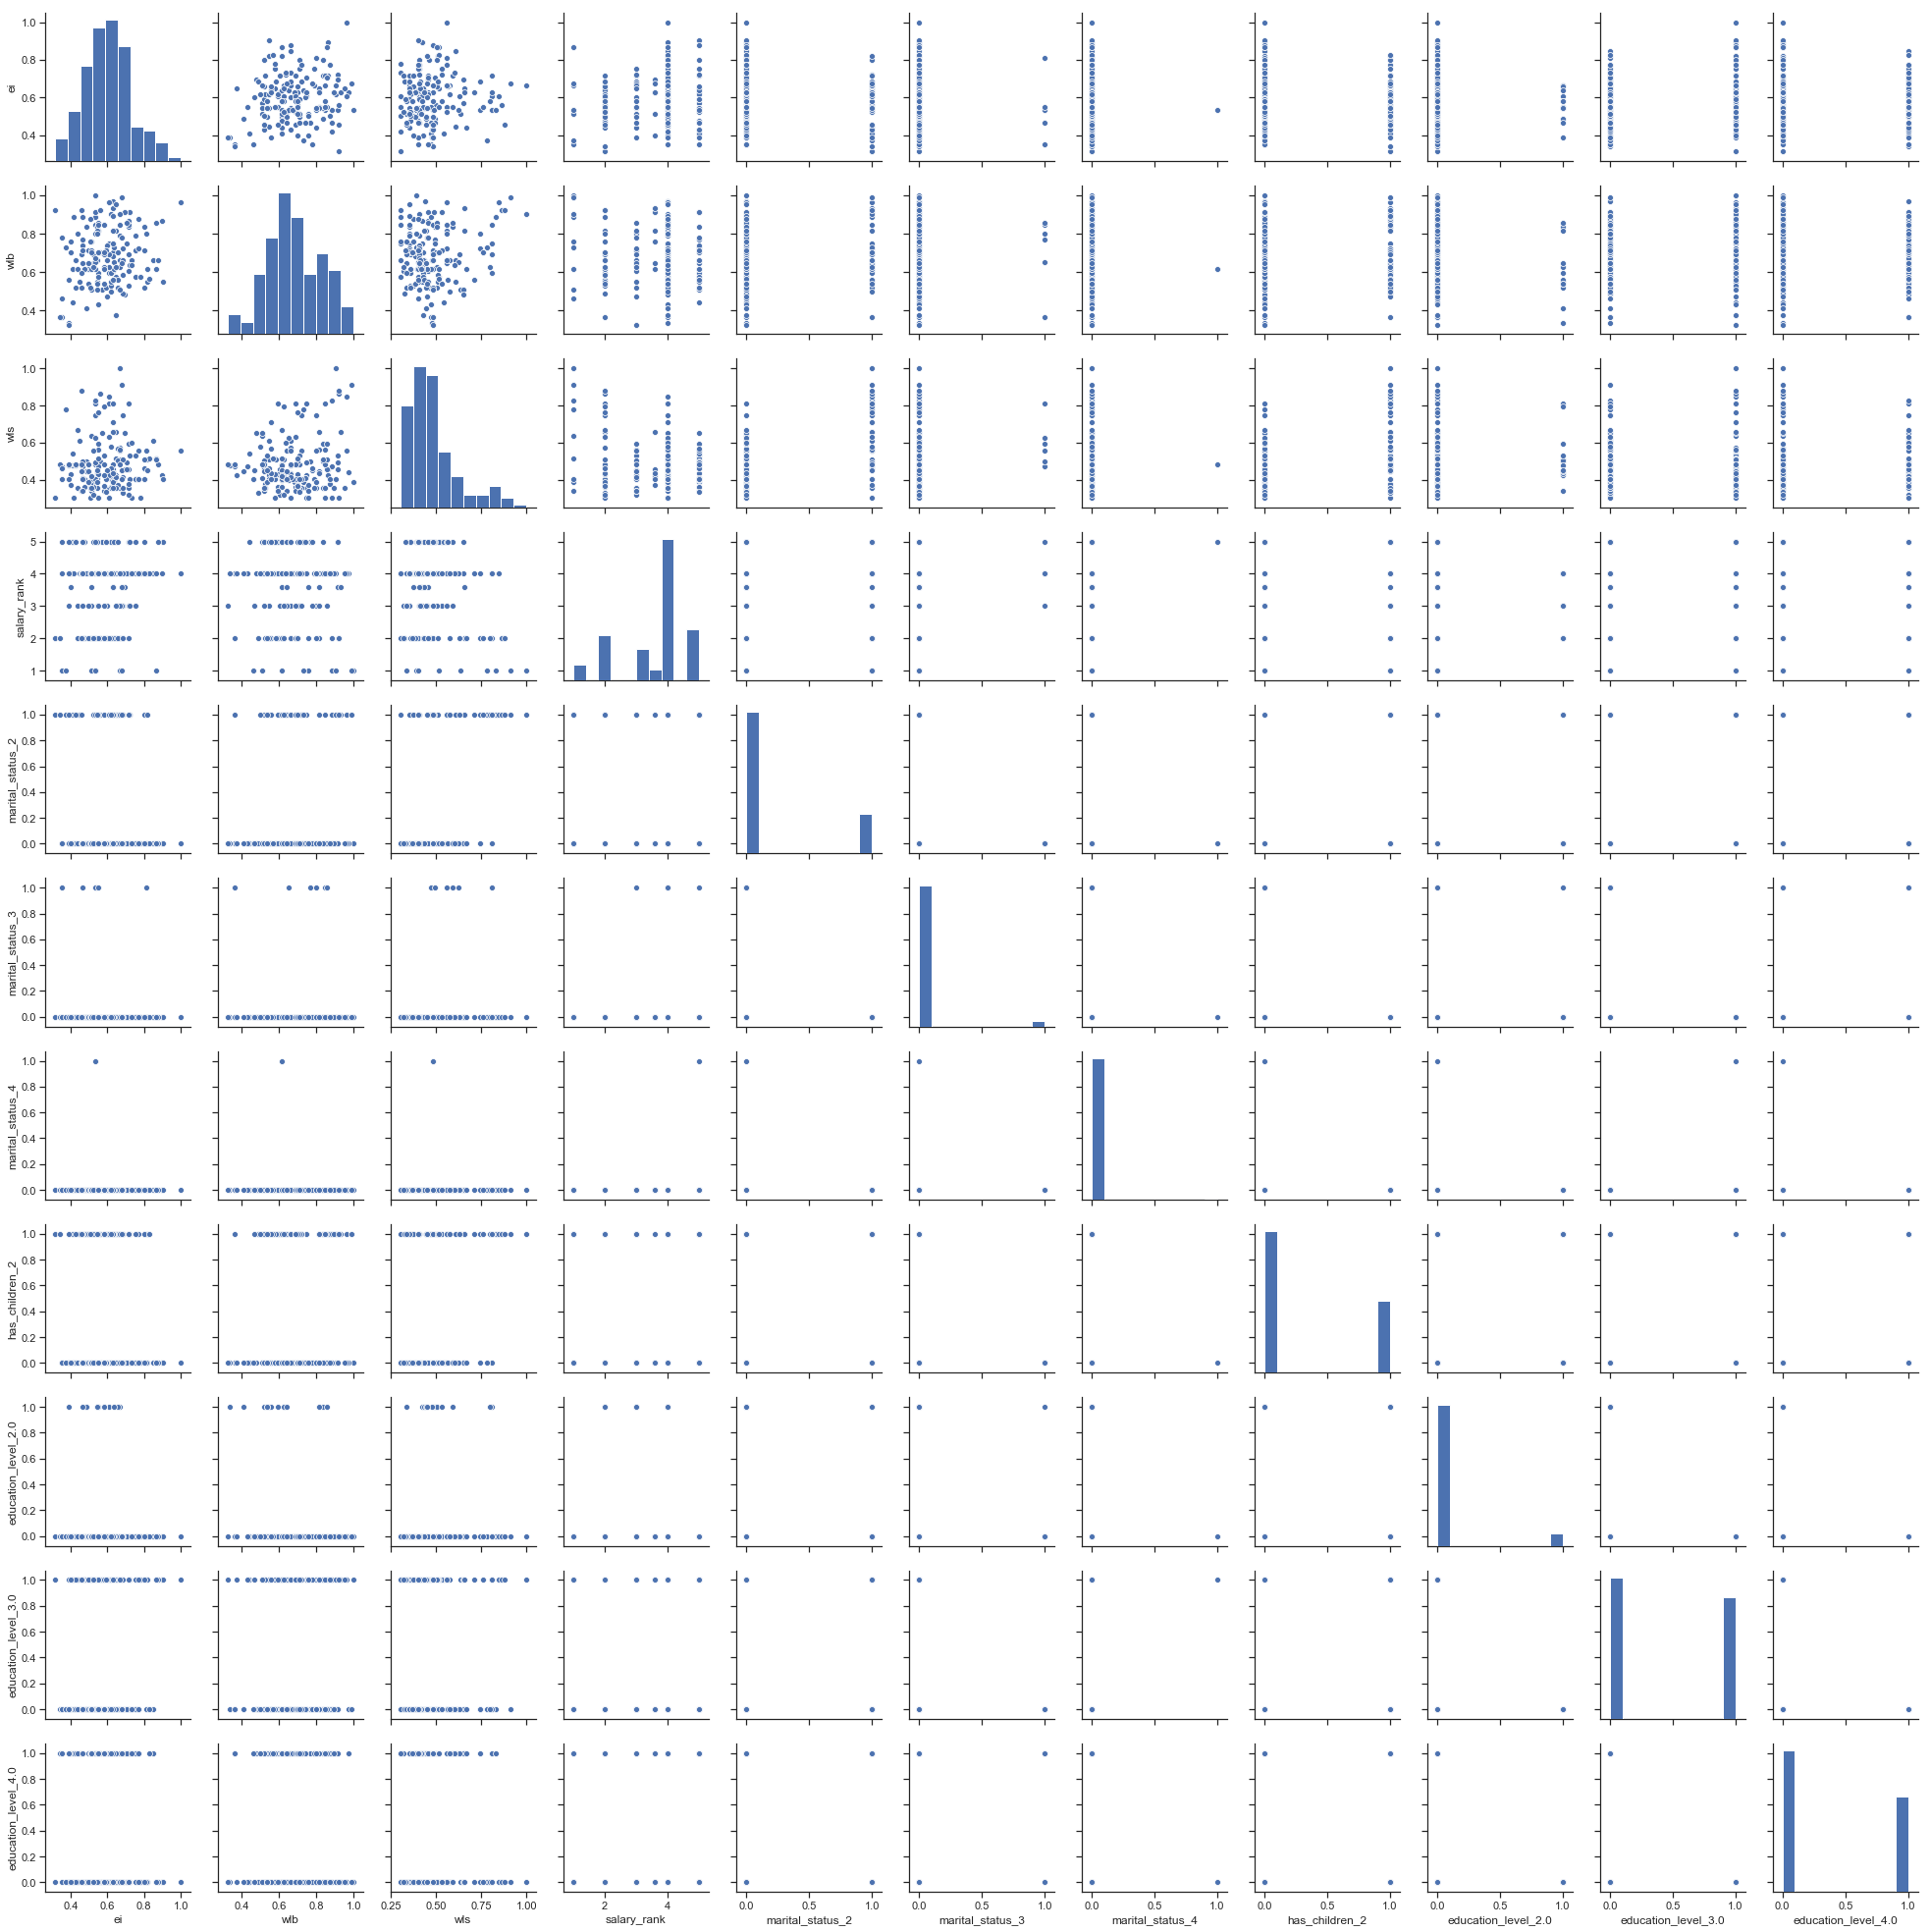

In [38]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(features_df)

#### relations between our target features

In [39]:
def pair_regression(df, x, y):
    ax = sns.regplot(x=df[x], y=df[y])
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    print(linregress(df[x], df[y]))
    plt.show()

LinregressResult(slope=0.18770943270250562, intercept=0.5734683791732902, rvalue=0.16398669644298491, pvalue=0.0331345501874468, stderr=0.0873775467653724)


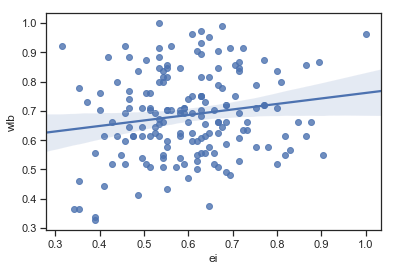

LinregressResult(slope=0.15286592778944677, intercept=0.378616783693557, rvalue=0.15991887407197652, pvalue=0.03781063098456813, stderr=0.0730175335590235)


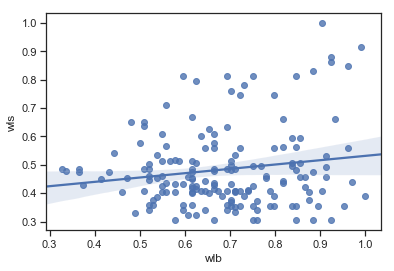

LinregressResult(slope=0.06073769853194749, intercept=0.4470816528591787, rvalue=0.055509827578017944, pvalue=0.4734821008292266, stderr=0.08453957886196924)


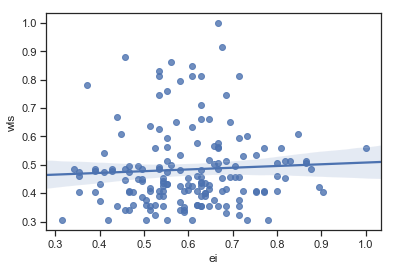

In [40]:
pair_regression(features_df, 'ei', 'wlb')
pair_regression(features_df, 'wlb', 'wls')
pair_regression(features_df, 'ei', 'wls')

#### Using multiple regerssion to find what affects wlb and wls - we are tryig to find significant effect for ei->wlb and wlb->wls

In [41]:
y = features_df['wlb'].values
X_features = features_df.columns.difference(['wlb']);
X = features_df[X_features].values
print(sm.OLS(y, sm.add_constant(X)).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     1.551
Date:                Sun, 03 Feb 2019   Prob (F-statistic):              0.126
Time:                        10:19:00   Log-Likelihood:                 94.783
No. Observations:                 169   AIC:                            -167.6
Df Residuals:                     158   BIC:                            -133.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5788      0.090      6.421      0.0

In [42]:
print(X_features)

Index(['education_level_2.0', 'education_level_3.0', 'education_level_4.0',
       'ei', 'has_children_2', 'marital_status_2', 'marital_status_3',
       'marital_status_4', 'salary_rank', 'wls'],
      dtype='object')


In [43]:
import statsmodels.api as sm
y = features_df['wls'].values
X_features = features_df.columns.difference(['wls']);
X = features_df[X_features].values
print(sm.OLS(y, sm.add_constant(X)).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     9.780
Date:                Sun, 03 Feb 2019   Prob (F-statistic):           1.26e-12
Time:                        10:19:00   Log-Likelihood:                 135.21
No. Observations:                 169   AIC:                            -248.4
Df Residuals:                     158   BIC:                            -214.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4113      0.073      5.660      0.0

In [44]:
print(X_features)

Index(['education_level_2.0', 'education_level_3.0', 'education_level_4.0',
       'ei', 'has_children_2', 'marital_status_2', 'marital_status_3',
       'marital_status_4', 'salary_rank', 'wlb'],
      dtype='object')


In [45]:
#split according to demogrphic param
#use pair plot - instaed

#1 נשוי
#2 רווק
#3 גרוש
#4 אלמן